In [1]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("http://stat.tamu.edu/~sheather/book/docs/datasets/nyc.csv", encoding='latin1')
del df["Case"]
print(df.shape)
df.head()

(168, 6)


,Restaurant,Price,Food,Decor,Service,East
0,Daniella Ristorante,43,22,18,20,0
1,Tello's Ristorante,32,20,19,19,0
2,Biricchino,34,21,13,18,0
3,Bottino,41,20,20,17,0
4,Da Umberto,54,24,19,21,0


In [5]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

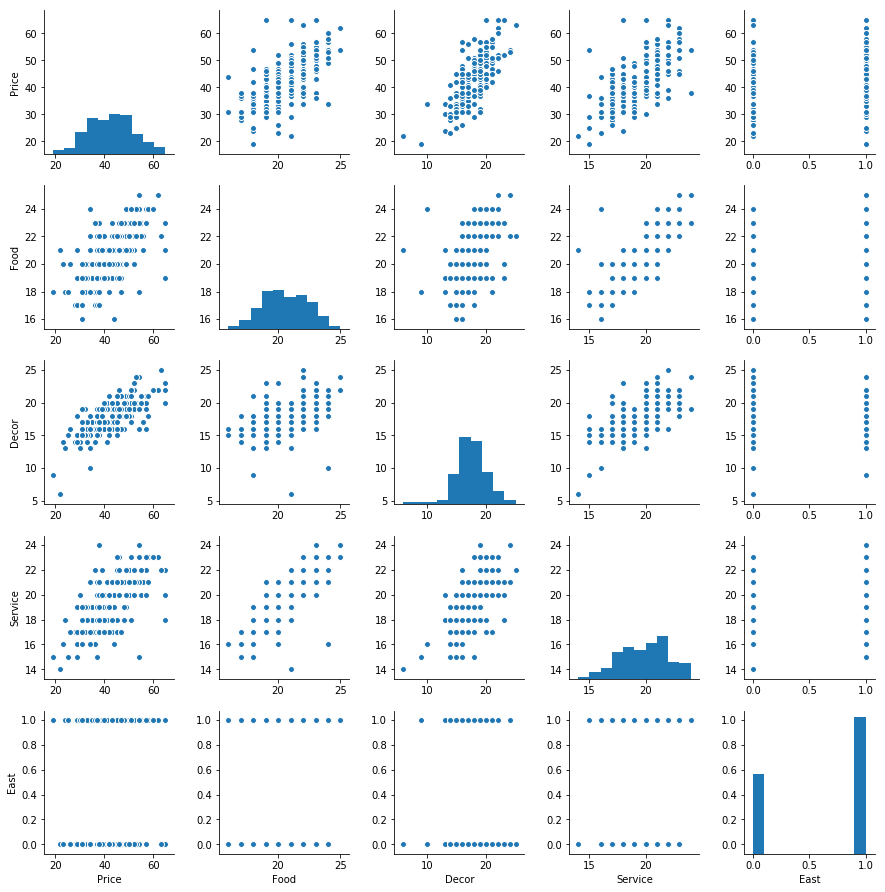

In [6]:
sns.pairplot(df)
plt.show()

### 1번

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

model_restaurant1 = sm.OLS.from_formula("Price ~ Food + Decor + Service + East", data=df)
result_restaurant1 = model_restaurant1.fit()
print(result_restaurant1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           5.35e-34
Time:                        00:53:33   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.0238      4.708     -5.102      0.0

### 2번

답 : Decor

### 3번

- 식당의 위치는 영향을 미친다.
- East 지역의 식당은 West 지역의 식당과 비교했을 때, 유의 수준 5%에서 약 0.2 ~ 3.9 달러 비싸다고 할 수 있다. .

### 4번

답 : Serivce

### 5번

답 : 모델1과 모델2의 F-Statistic 값을 비교했을 때, 모델2의 값이 더 작으므로, 모델의 성능이 더 좋다고 할 수 있다.

In [11]:
model_restaurant2 = sm.OLS.from_formula("Price ~ Food + Decor + East", data=df)
result_restaurant2 = model_restaurant2.fit()
print(result_restaurant2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           5.10e-35
Time:                        00:56:39   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.0269      4.673     -5.142      0.0

### 6번

답 : 46.95

In [12]:
data = [{'Food' : 20,
       'Decor' : 20,
       'Service': 20,
       'East':1}]

test = pd.DataFrame(data)

test = sm.add_constant(test, has_constant='add')
test

,const,Decor,East,Food,Service
0,1.0,20,1,20,20


In [13]:
result_restaurant2.predict(test)

0    46.954506
dtype: float64

### 7번

In [16]:
idx = result_restaurant2.resid_pearson > 2
df[idx]

,Restaurant,Price,Food,Decor,Service,East
29,Harry Cipriani,65,21,20,20,1
44,Bravo Gianni,56,22,17,21,1
47,Il Valletto Due Mila,56,21,17,20,1
55,Nello,54,18,16,15,1
102,Rao's,57,23,16,20,1
129,Rainbow Grill,65,19,23,18,0
131,San Domenico,65,23,22,22,0


In [22]:
pricePredicted = result_restaurant2.predict(df)
pricePredicted.head()

0    44.141438
1    42.978120
2    33.058228
3    44.887493
4    49.123502
dtype: float64

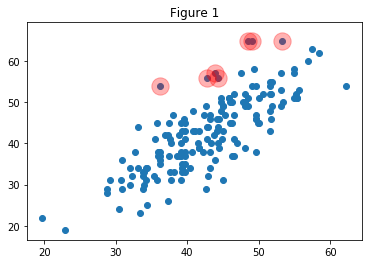

In [35]:
plt.scatter(pricePredicted, df.Price)
plt.scatter(pricePredicted[idx], df[idx].Price, s=300, c='r', alpha=0.3)
plt.title("Figure 1")
plt.show()

### 8번

In [36]:
influence = result_restaurant2.get_influence()
hat = influence.hat_matrix_diag
idx = hat>3 * hat.mean()
df[idx]

,Restaurant,Price,Food,Decor,Service,East
114,Lamarca,19,18,9,15,1
116,Veronica,22,21,6,14,0
167,Gennaro,34,24,10,16,0


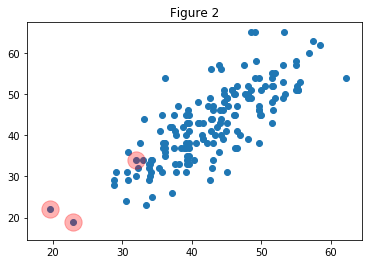

In [37]:
plt.scatter(pricePredicted, df.Price)
plt.scatter(pricePredicted[idx], df[idx].Price, s=300, c='r', alpha=0.3)
plt.title("Figure 2")
plt.show()

### 9번

In [38]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df) - 4 - 1)
idx = cooks_d2 > fox_cr
df[idx]

,Restaurant,Price,Food,Decor,Service,East
29,Harry Cipriani,65,21,20,20,1
49,Barbaresco,44,16,16,16,1
55,Nello,54,18,16,15,1
87,Erminia,54,25,24,24,1
102,Rao's,57,23,16,20,1
129,Rainbow Grill,65,19,23,18,0
131,San Domenico,65,23,22,22,0
138,Rino Trattoria,23,20,14,16,0
140,Trattoria Del Sogno,29,21,18,19,0


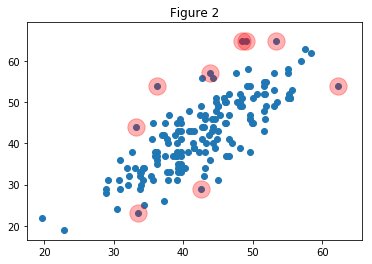

In [39]:
plt.scatter(pricePredicted, df.Price)
plt.scatter(pricePredicted[idx], df[idx].Price, s=300, c='r', alpha=0.3)
plt.title("Figure 2")
plt.show()